<a href="https://colab.research.google.com/github/BatoolMM/fastai/blob/master/Chapter_5_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Chapter 5: Image Classification**


In [ ]:
!pip install -Uqq fastbook
!pip install fastai
!pip install utils

In [ ]:
from utils import *
from fastai.vision.all import *
from fastai.vision.widgets import ImageClassifierCleaner
import matplotlib.pyplot as plt

In [3]:
path = untar_data(URLs.PETS)
Path.BASE_PATH = path

In [4]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [5]:
(path/"images").ls()

(#7393) [Path('images/great_pyrenees_161.jpg'),Path('images/basset_hound_65.jpg'),Path('images/shiba_inu_75.jpg'),Path('images/basset_hound_148.jpg'),Path('images/chihuahua_90.jpg'),Path('images/Sphynx_250.jpg'),Path('images/english_cocker_spaniel_59.jpg'),Path('images/Birman_63.jpg'),Path('images/Sphynx_155.jpg'),Path('images/shiba_inu_73.jpg')...]

In [6]:
fname = (path/"images").ls()[0]

In [7]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['great_pyrenees']

In [8]:

pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

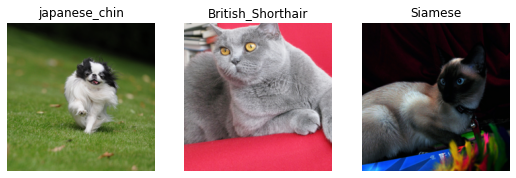

In [9]:
dls.show_batch(nrows=1, ncols=3)

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.536046,0.357700,0.115697,01:26


epoch,train_loss,valid_loss,error_rate,time
0,0.510235,0.336388,0.104871,01:33
1,0.348883,0.234741,0.080514,01:32
